# Unbounded Grids: The Semidiscrete Fourier Transform

$\newcommand{\Zb}{\mathbb{Z}}$
$\newcommand{\Rb}{\mathbb{R}}$
$\newcommand{\Lc}{\mathcal{L}}$
$\newcommand{\dint}{\displaystyle \int}$
$\newcommand{\dsum}{\displaystyle \sum}$
$\newcommand{\bkt}[1]{\left(#1\right)}$
We now derive our first spectral method, as given by the doubly infinite matrix in the previous chapter. This scherem applies to a discrete, unbounded domain, so it is not a practical method. However, it does introduce the mathematical ideas needed for the derivation and analysis of the practical schemes we shall see later.

   Our infinite grid is denoted by $h \Zb$, with grid points $x_j=jh$ for $j \in \Zb$, the set of all integers:

In [1]:
%load_ext tikzmagic

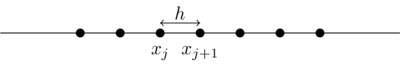

In [2]:
%%tikz --scale=0.75
\draw (0,0) -- (10,0);
\foreach \i in {2,3,...,8} {
    \draw [fill=black] (\i,0) circle (0.1);
}
\node at (4,-0.5) {$x_j$};
\node at (5,-0.5) {$x_{j+1}$};
\draw [<->] (4,0.25) -- (5,0.25);
\node at (4.5,0.5) {$h$};

We shall derive the infintie matrix by various methods based on the key ideas of the semi-discrete Fourier transform and band-limited sinc function interpolation. Before discretizing, we review the continuous case. The *Fourier transform* of a function $u(x)$, where $x \in \Rb$ is the function $\hat{u}$$\bkt{k}$ defined by
   
   \begin{align}
   \hat{u}\bkt{k} = \dint_{-\infty}^{\infty} e^{-ikx} u(x) dx, \,\,\,\,\, \forall k \in \Rb
   \label{eqn_FT}
   \end{align}

   The number $\tilde{u}(k)$ can be interpreted as the amplitude density of $u$ at wavenumber $k$, and this process of decomposing a function into its constituent waves is called *Fourier analysis*. Conversely, we can reconstruct $u$ from $\hat{u}$ by the inverse Fourier transform:
   
   \begin{align}
   u(x) = \dfrac1{2\pi}\dint_{-\infty}^{\infty} e^{ikx} \hat{u}\bkt{k} dk, \,\,\,\,\, \forall x \in \Rb
   \label{eqn_IFT}
   \end{align}
   
   This is *Fourier synthesis*. The variable $x$ is the physical variable, and $k$ is the *Fourier variable* or *wavenumber*.

   It should be noted that some technical conditions have to be met for the above integrals to make sense. For example, the function $u\bkt{x}$ and $\hat{u}\bkt{k} \in \Lc^2\bkt{\Rb}$, the Hilbert space of square-integrable functions on $\Rb$. However, this book will avoid most technicalities of measure theory and functional analysis.
   
   In our case, we want to consider $x$ ranging over $h \Zb$ rather than $\Rb$. Precise analogues of the Fourier transform and its inverse exist for this case. The crucial point is that because the spatial domain is discrete, the wavenumber $k$ will no longer range over all of $\mathcal{R}$. Instead, the appropriate wavenumber domain is a bounded interval of length $2\pi/h$, and one suitable choice is $[-\pi/h,\pi/h]$. Remember, $k$ is *bounded* because $x$ is *discrete*:

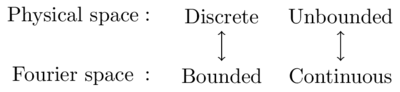

In [3]:
%%tikz --scale=1

\node at (0,0) {Physical space};
\node at (1.25,0) {:};
\node at (2.5,0) {Discrete};
\node at (4.5,0) {Unbounded};
\node at (0,-1) {Fourier space};
\node at (1.25,-1) {:};
\node at (2.5,-1) {Bounded};
\node at (4.5,-1) {Continuous};
\draw [<->] (2.5,-0.75) --  (2.5,-0.25);
\draw [<->] (4.5,-0.75) --  (4.5,-0.25);

The reason for these connections is the phenomenon known as *aliasing*. Two complex exponentials $f(x)=\exp\bkt{ik_1x}$ and $g(x)=\exp\bkt{ik_2x}$ are unequal over $\Rb$ if $k_1 \neq k_2$. If we restrict $f$ and $g$ to $h \Zb$, however, they take values $f_j=\exp\bkt{ik_1x_j}$ and $g_j=\exp\bkt{ik_2x_j}$, and if $k_1-k_2$ is an integer multiple of $2\pi/h$, then $f_j=g_j$ for each $j$. It follows that for any complex exponential $\exp\bkt{ikx}$, there are infinitely many other complex exponentials that match it on the grid $h \Zb$ - "aliases" of $k$. Consequently, it suffices to measure wavenumbers for the grid in an interval of lnegth $2\pi/h$, and for reasons of symmetry, we choose the interval $\left[-\pi/h,\pi/h\right]$.

   Figure below illustrates aliasing of the function $\sin\bkt{\pi x}$ and $\sin \bkt{9 \pi x}$. The dots represent restrictions to the grid $\dfrac14 \Zb$, where these two functions are identical.

In [7]:
import matplotlib.pyplot as plt;
import pylab as pl;
import scipy as sp;
from ipywidgets import interact;

N = 1000;
x = sp.linspace(-1,1,N);
@interact
def sin(f=(9, 49, 8)):
    pl.plot(x,sp.sin(sp.pi*x));
    pl.plot(x,sp.sin(f*sp.pi*x));
    xin = sp.linspace(-1,1,9);
    yin = sp.sin(sp.pi*xin);
    pl.plot(xin,yin,'ro');
    pl.rcParams["figure.figsize"] = [16,4];
    pl.title('An example of aliasing. On the grid $0.25\mathbb{Z}$, the functions $\sin(\pi x)$ and $\sin((8n+1) \pi x)$ are identical.');
    pl.show();

interactive(children=(IntSlider(value=25, description='f', max=49, min=9, step=8), Output()), _dom_classes=('w…

Aliasing happens in non-mathematical ife, too, for eacmple in the "wagon wheel effect" in movies. If, say, the shutter of a camera clicks $24$ times a second and the spokes on a wagon wheel pass the vertical $20$ times a second, then it looks as if the wheel is rotating at the rate of $-4$ spokes per second, i.e., backwards. Higher-frequency analogues of the same phenomenon are the basis of the science of stroboscopy, and a spatial rather than teporal version of aliasing causes Moire patterns.

Below is an example of aliasing, where it appears to the eye that the rotor of the helicopter is stationary even as the helicopter lifts in the air. This essentially conveys that the frequency at which the rotor of the aircraft rotates is an integral multiple of the frequency of the camera shutter.

<video width="640" height="480" controls src="./Aliasing.mp4"/>

For a function $v$ defined on $h \Zb$ with value $v_j$ at $x_j$, the *semi-discrete Fourier transform* is defined by

\begin{align}
   \hat{v}\bkt{k} & = h \dsum_{j=-\infty}^{\infty} e^{-ikx_j} v_j, \,\,\,\, k \in \left[-\dfrac{\pi}h,\dfrac{\pi}h\right]
\end{align}

and the *inverse semidiscrete Fourier transform* is

\begin{align}
   v_j & = \dfrac1{2\pi} \dint_{-\pi/h}^{\pi/h} e^{ikx_j} \hat{v}\bkt{k} dk, \,\,\,\, j \in \Zb
\end{align}

Note that the *semi-discrete Fourier transform* approximates the *Fourier transform* by a trapezoidal rule, and the *inverse semidiscrete Fourier transform* approximates the *inverse Fourier transform* by truncating $\Rb$ to the interval $\left[-\dfrac{\pi}h,\dfrac{\pi}h\right]$. Note that as $h \to 0$, the two pairs of formulas converge.

It is also good to keep in mind that the above formulas hold (or makes sense) for $v \in \ell^2\bkt{\Zb}$, the set of square-summable grid functions and $\hat{v} \in L^2 \left[-\dfrac{\pi}h, \dfrac{\pi}h\right]$ (the set of square-integrable measurable functions on $\left[-\dfrac{\pi}h, \dfrac{\pi}h\right]$).

   If the expression *semi-discrete Fourier transform* is unfamiliar, that may be because we have given a new neame to an old concept. A *Fourier series* represents a function on a bounded interval as a sum of complex exponentials at discrete wavenumbers. We have used the term *semidiscrete Fourier transform* to emphasize that our concern here is the inverse problem: it is the "space" variable that is discrete and the "Fourier" variable that is a bounded interval. Mathematically, there is no difference from the theoru of Fourier series, which is presented in numerous books and is one of the most extensively worked branches of mathematics.
   
   For spectral differentiation, we need an interpolant, and the *inverse semidiscrete Fourier transform* immediate gives us one. All we need to do is to evaluate the same formula for $x\in\Rb$ rather than just $x_j \in h \Zb$, i.e., after determining $\hat{v}$, we define our interpolant $p$ by
   \begin{align}
   p(x) & = \dfrac1{2\pi} \dint_{-\pi/h}^{\pi/h} e^{ikx} \hat{v}\bkt{k} dk, \,\,\,\, x \in \Rb
   \end{align}

   This is an analytic function of $x$, with $p\bkt{x_j} = v_j$ for each $j$. Moreover, by construction, the Fourier transform $\hat{p}$, is
   $$\hat{p}\bkt{k} = \begin{cases}
   \hat{v}\bkt{k} & k \in \left[-\pi/h,\pi/h\right]\\
   0 & \text{otherwise}
   \end{cases}$$

   Thus $\hat{p}$ has compact support in $\left[-\dfrac{\pi}h, \dfrac{\pi}h\right]$. We say that $p$ is the *band-limited interpolant* of $v$, by which we mean not just that $\hat{p}$ has compact support, but that this support is contained in the particular interval $\left[-\dfrac{\pi}h, \dfrac{\pi}h\right]$. Although, there are an infinite number of possible interpolants for any grid function, there is only one band-limited interpolant defined in this sense. This result is known in as the *sampling theorem* and is associated with the names of Whittaker, Shannon and Nyquist.

   We are ready to give our first two descriptions of spectral differentiation of a function $v$ defined on $h\Zb$. Here is one:
<li>Given $v$, determine its band-limited interpolant $p$ by the above formula</li>
<li>Set $w_j = p'\bkt{x_j}$</li>

   Another is obtained by saying the same thing in Fourier space. If $u$ is a differentiable function with Fourier transform $\hat{u}$, then the Fourier transform of $u'$ is $ik \hat{u}\bkt{k}$:
   $$\hat{u'}\bkt{k} = ik \hat{u}\bkt{k}$$

   This result can be obtained by differentiating the above with respect to $x$. And thus we have an equivalent procedure for spectral differentiation.
<li>Given $v$, compute its semidiscrete Fourier transform $\hat{v}$</li>
<li>Define $\hat{w}\bkt{k} = ik\hat{v}\bkt{k}$</li>
<li>Compute $w$ from $\hat{w}$</li>

   Both of these descriptions of spectral differentiation are mathematically complete, but we have not yet derived the coefficents of the matrix. To do this, we can use the Fourier transform to go back and get a fuller understanding of the band-limited interpolant $p\bkt{x}$. Let $\delta$ be the *Krnonecker delta function*,
   \begin{align}
    \delta_j = \begin{cases}
    1 & \text{ if }j=0\\
    0 & \text{ otherwise}
    \end{cases}
   \end{align}

It is easy to check that *semidiscrete Fourier transform* of $\delta$ is a constant: $\hat{\delta}\bkt{k} = h$ for all $k \in \left[-\dfrac{\pi}h,\dfrac{\pi}h\right]$. The band-limited interpolant of $\delta$ is accordingly
\begin{align}
p(x) & = \dfrac{h}{2\pi} \dint_{-\pi/h}^{\pi/h} e^{ikx}dk = \dfrac{\sin\bkt{\pi x/h}}{\pi x/h}
\end{align}
with the value of $1$ at $x=0$. This famous and beautiful function is called the sinc function, i.e.,
$$S_h(x) = \dfrac{\sin\bkt{\pi x/h}}{\pi x/h}$$
Sir Edmund Whittaker called $S_1$ "...a function of royal blood in the family of entire functions, whose distinguished properties separate it from its bourgeois brethen".

   Now that we know how to interpolate the delta function, we can interpolate anything. Band-limited inteprolation is a translation-invariant process in the sense that for any $m$, the band-limited interpolant of $\delta_{j-m}$ is $S_h\bkt{x-x_m}$. A general grid function can be written as
   \begin{align}
   v_j & = \dsum_{m=-\infty}^{\infty} v_m \delta_{j-m}
   \end{align}
   Hence, it follows from the linearity of the semidiscrete Fourier transform that the band-limited interpolant of $v$ is a linear combination of translated sinc functions:
   \begin{align}
   p(x) & = \dsum_{m=-\infty}^{\infty} v_m S_h\bkt{x-x_m}
   \end{align}
   The derivative is accordingly given by
   \begin{align}
   w_j & = p'\bkt{x_j} = \dsum_{m=-\infty}^{\infty} v_m S_h' \bkt{x_j-x_m}
   \end{align}
   And now let's derive the entries of the double infinite Toeplitz matrix $D$. If we interpret the above as a matrix equation, we see that the vector $S_h'\bkt{x_j}$ is the column $m=0$ of $D$, with the other columns obtained by shifting this column up or down appropriately. The entries are determined by the calculus excercie of differentiating $S_h\bkt{x}$ to get
   \begin{align}
   S_h'\bkt{x_j} & =
   \begin{cases}
   0 & \text{ if }j=0\\
   \dfrac{\bkt{-1}^j}{jh} & \text{otherwise}
   \end{cases}
   \end{align}
   A similar pattern applied to all spectral collocation methods. The $m^{th}$ column of a spectral differentiation matrix contains the values $p'\bkt{x_j}$, where $p\bkt{x}$ is the global interpolant through the discrete delta function supported at $x_m$.
   The next program illustrates band-limited interpolation by plotting three discrete functions defined on $\Zb$ (i.e., $h=1$) together with their band-limited interpolants.

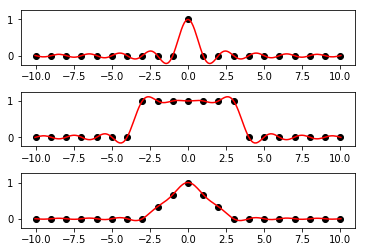

In [5]:
# Band limited interpolation
import scipy as sp;
import matplotlib.pyplot as plt
h=1;
xmax=10;
N=2*xmax//h;
x=sp.linspace(-xmax,xmax,N+1); # computational grid
xx=sp.linspace(-xmax-h/20,xmax+h/20,10*(N+1)); # plotting grid


for i in range(1,4):
    plt.subplot(3,1,i);
    if (i==1):
        v=(x==0);
    if (i==2):
        v=(sp.absolute(x)<=3.0);
    if (i==3):
        v=(sp.maximum(0,1-sp.absolute(x)/3.0));
    plt.plot(x,v,'ko');
    p = sp.zeros(sp.size(xx));
    for j in range (0,sp.size(x)):
        y = (xx-x[j])/h;
        p = p+v[j]*sp.sin(sp.pi*y)/(sp.pi*y);      
    plt.plot(xx,p,'r-');
    plt.axis([-11, 11, -0.25, 1.25]);

plt.rcParams["figure.figsize"] = [16,6]
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5);
plt.show()


It is clear from the first of the three plots above that the sinc function is smooth. The second plot, depicting the interpolant of a discrete square wave, shows that since interpolants are not particularly good for approximating non-smooth functions. The oscillations near the discontinuity will not diminish in amplitude as $h \to 0$, and they are not even well localized in space. This generation of oscillations near discontinuities is called the *Gibbs phenomenon*. The third plot shows a discrete triangular wave or "hat function" and its interpolant. Here the interpolation is somewhat better, but it is still not impressive. In fact, as well explain in detail in Chapter $4$, the accuracy of the interpolation depends upon the smoothness of $u$, and these examples are no very smooth. Each extra derivative possessed by $u$ improves the order of accuracy by $1$.

   To find higher order spectral derivatives, we can differentiate $p(x)$ several times. For example, the result
    \begin{align}
    S_h''\bkt{x_j} & = \begin{cases}
    -\dfrac{\pi^2}{3h^2} & \text{ if }j=0,\\
    \dfrac{2 \cdot \bkt{-1}^{j+1}}{j^2h^2} & \text{ otherwise}
    \end{cases}
    \end{align}
    tells us the entries of each column of the symmetric double infinite Toeplitz matrix $D^2$ corresponding to the second derivative, i.e.,
    \begin{align}
   h^2  D^2_{j,m} & = \begin{cases}
    -\dfrac{\pi^2}{3} & \text{ if }j=m,\\
    \dfrac{2 \cdot \bkt{-1}^{j-m+1}}{(j-m)^2} & \text{ otherwise}
    \end{cases}
    \end{align}

## Summary of this chapter

A function $v$ on the grid $h \Zb$ has a unique interpolant $p$ that is band-limited to wavenumbers in the interval $\left[-\dfrac{\pi}h,\dfrac{\pi}h\right]$. We can compute $p'$ on the grid by evaluating the inverse semi-discrete Fourier transform of $ik\hat{v}$, or alternatively, as a linear combination of derivatives of translates of sinc functions.

In [6]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>